In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
plt.style.use("seaborn-v0_8")

Воспользуемся библиотечной реализацией:

In [3]:
df = pd.read_csv(Path("chips.csv"))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df[["x", "y"]], df["class"], test_size=0.33, random_state=645,
                                                    shuffle=True)

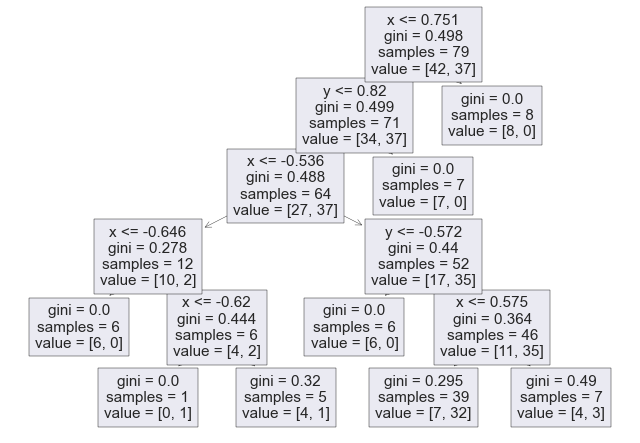

In [5]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

_ = plot_tree(clf, feature_names=["x", "y"])

In [6]:
max_heights = [h for h in range(1, 12)]
accuracy_train = []
accuracy_test = []

for max_height in max_heights:
    clf = DecisionTreeClassifier(max_depth=max_height)
    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    accuracy_train.append(len(list(filter(lambda t: t[0] == t[1], zip(y_train, y_pred_train)))) / len(y_train))
    accuracy_test.append(len(list(filter(lambda t: t[0] == t[1], zip(y_test, y_pred_test)))) / len(y_test))

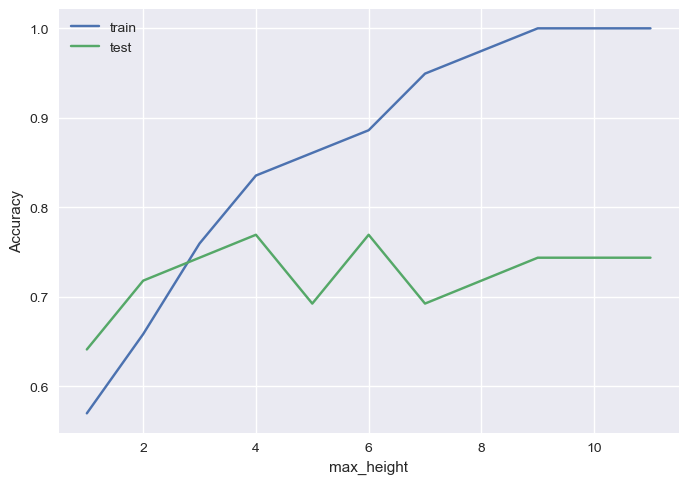

In [7]:
plt.plot(max_heights, accuracy_train, label="train")
plt.plot(max_heights, accuracy_test, label="test")
plt.legend()
plt.xlabel("max_height")
plt.ylabel("Accuracy")
plt.show()

### Случайный лес

In [8]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.inspection import DecisionBoundaryDisplay

In [9]:
df = pd.read_csv(Path("chips.csv"))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df[["x", "y"]], df["class"], test_size=0.33, random_state=645,
                                                    shuffle=True)

1. Построим график зависимости качества классификации от числа деревьев на тестовой и тренировочной части набора данных:

In [11]:
forest_sizes = [e for e in range(10, 251, 10)]
accuracy_train = []
accuracy_test = []

for n_estimators in forest_sizes:
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=5, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    accuracy_train.append(len(list(filter(lambda t: t[0] == t[1], zip(y_train, y_pred_train)))) / len(y_train))
    accuracy_test.append(len(list(filter(lambda t: t[0] == t[1], zip(y_test, y_pred_test)))) / len(y_test))

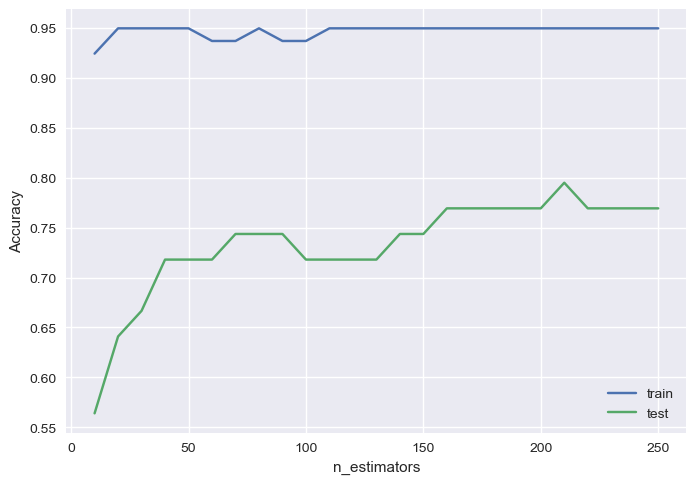

In [12]:
plt.plot(forest_sizes, accuracy_train, label="train")
plt.plot(forest_sizes, accuracy_test, label="test")
plt.legend()
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.show()

2. Визуализируем, как всё пространство классифицируется алгоритмом для разного числа деревьев:

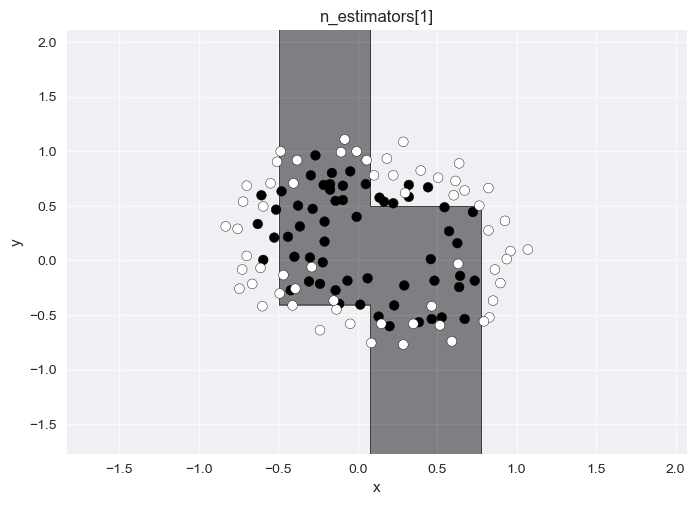

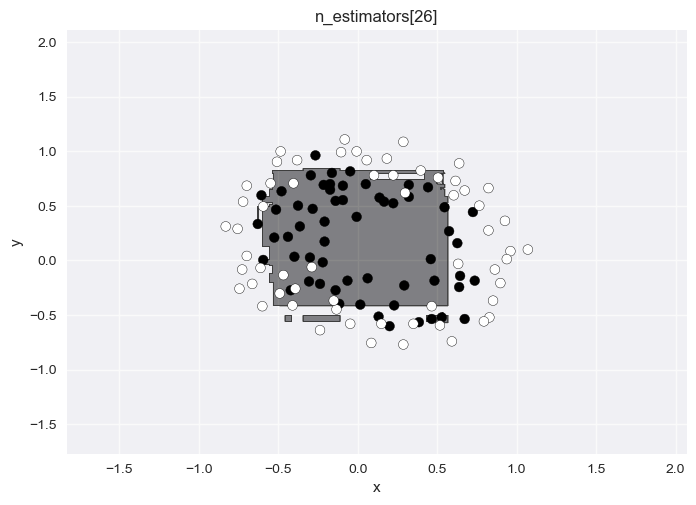

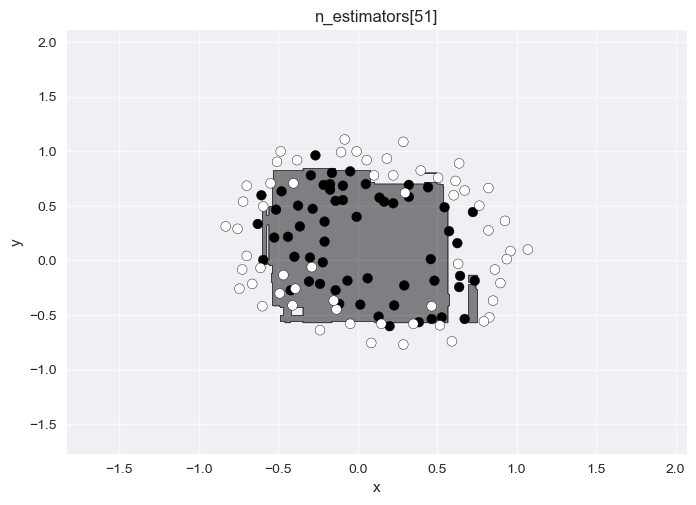

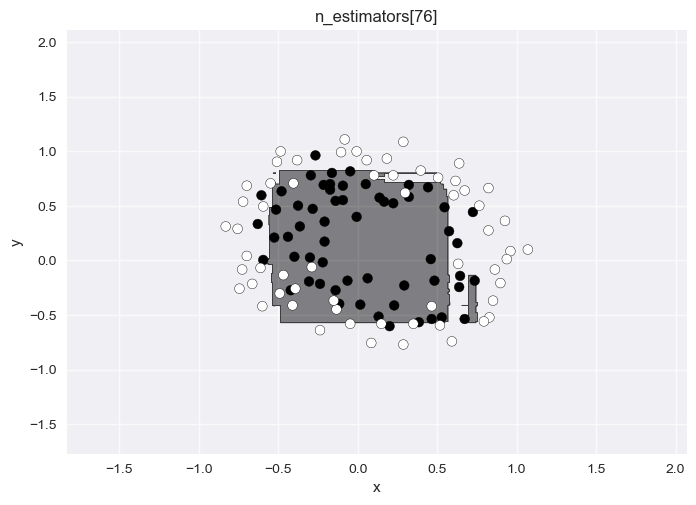

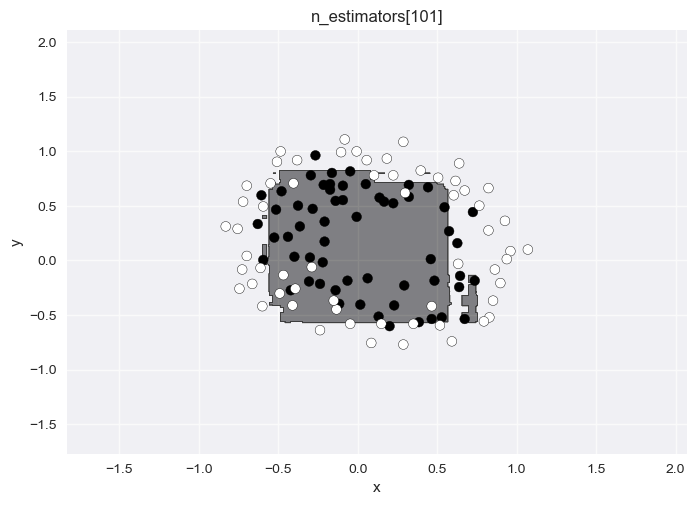

In [13]:
for n_estimators in range(1, 102, 25):
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=3, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)

    disp = DecisionBoundaryDisplay.from_estimator(clf, df[["x", "y"]], response_method="predict", grid_resolution=1000,
                                                  alpha=0.5)
    disp.ax_.scatter(df.x, df.y, c=df["class"], edgecolor="k")

    plt.title(f"n_estimators[{n_estimators}]")
    plt.show()

### Бустинг

1. Построим график зависимости качества классификации от числа деревьев на тестовой и тренировочной части набора данных:

In [14]:
estimator_counts = [e for e in range(10, 251, 10)]
accuracy_train = []
accuracy_test = []

for n_estimators in estimator_counts:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=n_estimators, random_state=645)
    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    accuracy_train.append(len(list(filter(lambda t: t[0] == t[1], zip(y_train, y_pred_train)))) / len(y_train))
    accuracy_test.append(len(list(filter(lambda t: t[0] == t[1], zip(y_test, y_pred_test)))) / len(y_test))

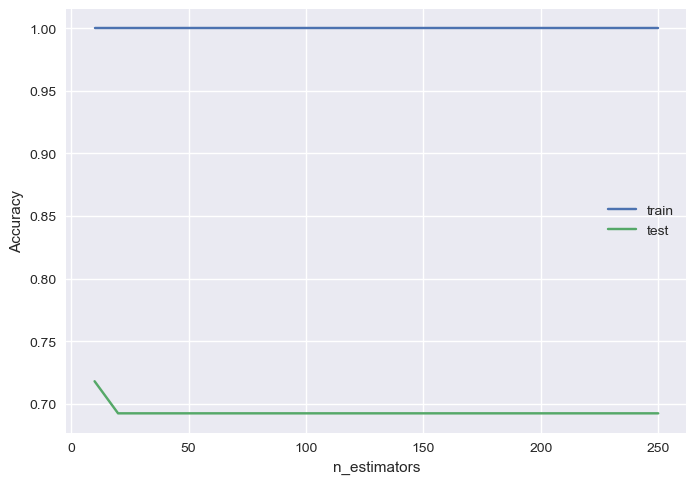

In [15]:
plt.plot(estimator_counts, accuracy_train, label="train")
plt.plot(estimator_counts, accuracy_test, label="test")
plt.legend()
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.show()

2. Визуализируем, как всё пространство классифицируется алгоритмом для разного числа деревьев:

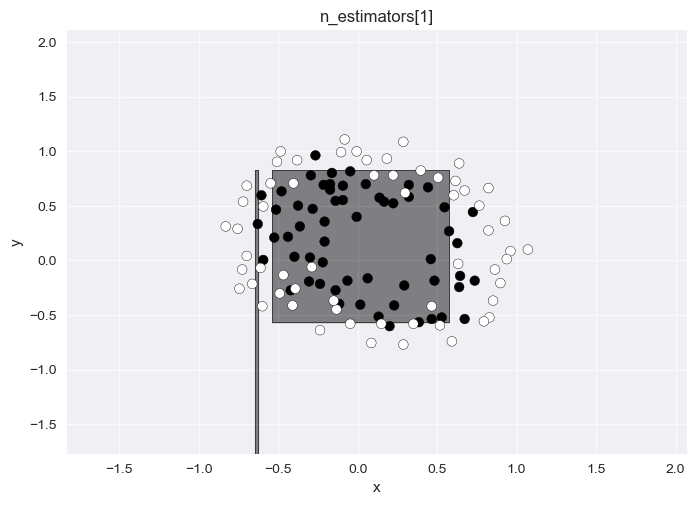

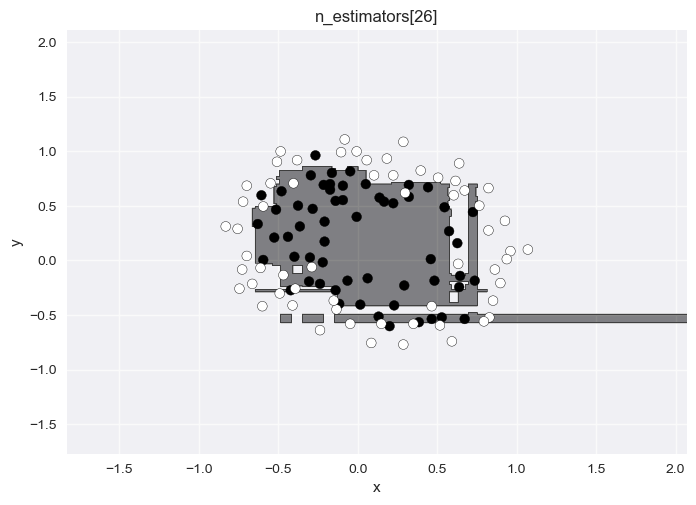

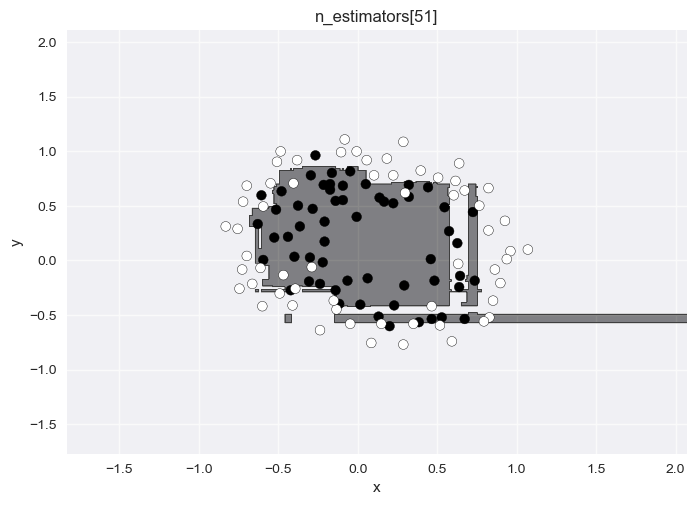

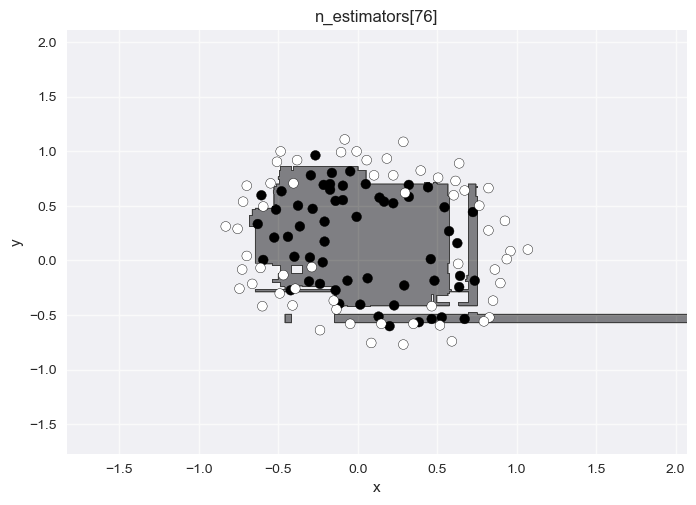

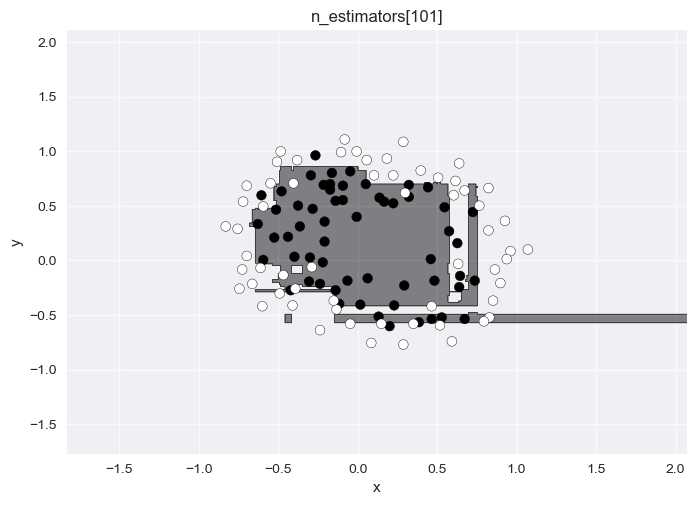

In [16]:
for n_estimators in range(1, 102, 25):
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=n_estimators, random_state=645)
    clf.fit(X_train, y_train)

    disp = DecisionBoundaryDisplay.from_estimator(clf, df[["x", "y"]], response_method="predict", grid_resolution=1000,
                                                  alpha=0.5)
    disp.ax_.scatter(df.x, df.y, c=df["class"], edgecolor="k")

    plt.title(f"n_estimators[{n_estimators}]")
    plt.show()